In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *
data_path = "../data/sgdm_wobn"
image_path = "./images/sgdm_wobn"

2025-03-10 22:03:16.506312: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-10 22:03:16.515705: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-10 22:03:16.518506: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-10 22:03:17.022835: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
lr_fn = lambda js : js["optimizer"]["lr"]
p_fn = lambda js : js["norm"]["norm_multiply"]
wd_fn = lambda js : js["optimizer"]["lambda_wd"]
get_hyperparam_best_acc(data_path,
                        ["noreg","norm","cnorm","cnormu","gcstdu","wd"],
                        [lr_fn,p_fn,p_fn,p_fn,p_fn,wd_fn])

Best of noreg is 0.0128 & 82.43\%
Best of norm is 1.0 & 84.41\%
Best of cnorm is 0.8 & 86.9\%
Best of cnormu is 0.8 & 84.8\%
Best of gcstdu is 1.0 & 84.02\%
Best of wd is 8e-05 & 84.17\%


In [ ]:
exps = ["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"]
labels = [r"Noreg $lr = 0.0128$", r"Norm $p=1$", r"CNorm $p=0.8$", r"CNormU $p=0.8$", r"GCstdU $p=1$", r"WD $\lambda_{wd}=8e^{-5}$" ]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))

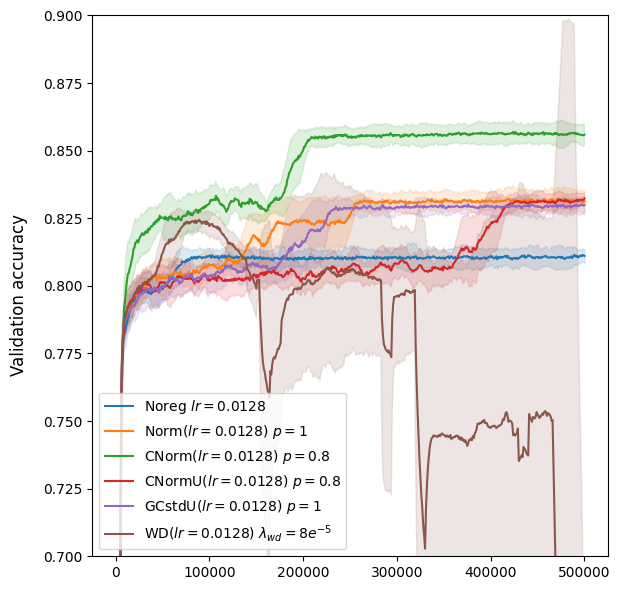

In [16]:
fig,axs = plot_wobn_best_hyperparameter_validation_curve(data_path,image_path,
                                               ["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"],
                                               [r"Noreg $lr = 0.0128$", r"Norm($lr = 0.0128$) $p=1$", r"CNorm($lr = 0.0128$) $p=0.8$", r"CNormU($lr = 0.0128$) $p=0.8$",
                                                 r"GCstdU($lr = 0.0128$) $p=1$", r"WD($lr = 0.0128$) $\lambda_{wd}=8e^{-5}$" ],
                                               [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]],
                                               500000)
fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig(f"{image_path}/best_hyperparameter_validation_accuracy.png", bbox_inches='tight',dpi=1200)

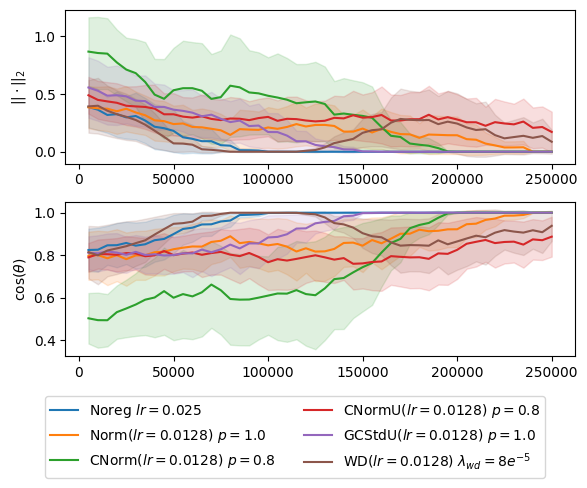

In [2]:
fig,axs = distribution_drift(data_path,["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"],
                             [r"Noreg $lr=0.025$","Norm($lr=0.0128$) $p=1.0$","CNorm($lr=0.0128$) $p=0.8$","CNormU($lr=0.0128$) $p=0.8$","GCStdU($lr=0.0128$) $p=1.0$",r"WD($lr=0.0128$) $\lambda_{wd}=8e^{-5}$"],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]])
fig.set_size_inches(6,4)
fig.tight_layout()
fig.savefig(f"{image_path}/ics.png", bbox_inches='tight',dpi=1200)

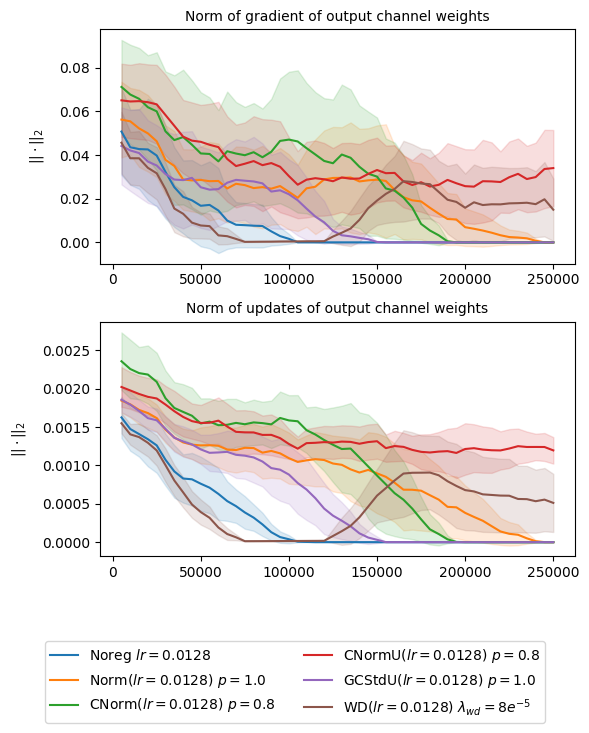

In [7]:

fig,axs = gradients_and_updates(data_path,["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"],
                     [r"Noreg $lr=0.0128$","Norm($lr=0.0128$) $p=1.0$","CNorm($lr=0.0128$) $p=0.8$","CNormU($lr=0.0128$) $p=0.8$","GCStdU($lr=0.0128$) $p=1.0$",r"WD($lr=0.0128$) $\lambda_{wd}=8e^{-5}$"],
                     [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]],"mg_spacing_0",layer="conv|out")

fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig(f"{image_path}/grad_and_update_norm.png", bbox_inches='tight',dpi=1200)


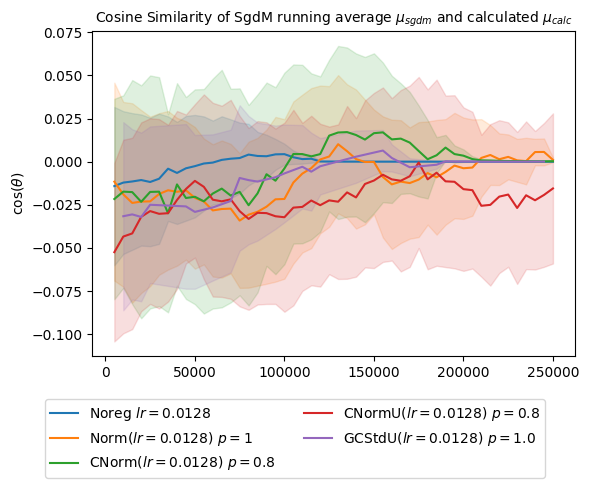

In [2]:
fig,axs = sgdm_drift(data_path,["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1"],
                             [r"Noreg $lr=0.0128$","Norm($lr=0.0128$) $p=1$","CNorm($lr=0.0128$) $p=0.8$","CNormU($lr=0.0128$) $p=0.8$","GCStdU($lr=0.0128$) $p=1.0$"],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]])

fig.set_size_inches(6,4)
fig.tight_layout()
